In [112]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, make_scorer
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

Benchmark bei nicht modifizierter Anwendung von XGBoost

Declare X as the predictor columns and y as the target column, where the
last row is the target column


In [113]:
df = pd.read_csv('spambase.data', header=None)
Y=df[57]
X=df.drop([57],axis=1)


Initialize XGBClassifier with the booster='gbtree' and
objective='binary:logistic' defaults along with
random_state=2

In [114]:
model = XGBClassifier(random_state=2)

In [115]:

scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score)
}

scores = cross_validate(model, X, Y, cv=5, scoring=scorers)

accuracy_scores = scores['test_accuracy']
precision_scores = scores['test_precision']

print('Accuracy:', np.round(scores['test_accuracy']*100, 2))
print('Accuracy mean: %0.2f' % (scores['test_accuracy'].mean()*100))
print('---')
print('Precision:', np.round(scores['test_precision']*100, 2))
print('Precision mean: %0.2f' % (scores['test_precision'].mean()*100))

Accuracy: [95.22 94.67 95.22 97.39 83.26]
Accuracy mean: 93.15
---
Precision: [95.44 95.64 92.76 97.47 74.76]
Precision mean: 91.22


Confusion Matrix

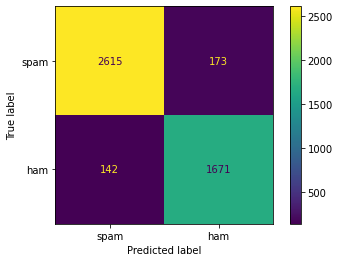

In [116]:

# Verwende cross_val_predict, um Vorhersagen für jeden Fold zu erhalten
y_pred = cross_val_predict(model, X, Y, cv=5)

# Berechne die Confusion Matrix
cm = confusion_matrix(Y, y_pred)
#print("Confusion Matrix:")
#print(cm)

#cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels={'ham','spam'})
disp.plot()

plt.show()


Benchmark bei Verwendung von modifizierten Datensätzen

Einlesen der vorbereiteten Datensätze

In [117]:
df = pd.read_csv('selected_data_44.csv', header=None)
Y=df[45]
X=df.drop([45],axis=1)


In [118]:
model = XGBClassifier(random_state=2)

In [119]:

scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score)
}

scores = cross_validate(model, X, Y, cv=5, scoring=scorers)

accuracy_scores = scores['test_accuracy']
precision_scores = scores['test_precision']

print('Accuracy:', np.round(scores['test_accuracy']*100, 2))
print('Accuracy mean: %0.2f' % (scores['test_accuracy'].mean()*100))
print('---')
print('Precision:', np.round(scores['test_precision']*100, 2))
print('Precision mean: %0.2f' % (scores['test_precision'].mean()*100))




Accuracy: [ 69.71 100.   100.   100.    80.33]
Accuracy mean: 90.01
---
Precision: [ 56.54 100.   100.   100.   100.  ]
Precision mean: 91.31


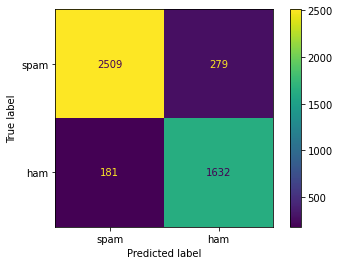

In [120]:

# Verwende cross_val_predict, um Vorhersagen für jeden Fold zu erhalten
y_pred = cross_val_predict(model, X, Y, cv=5)

# Berechne die Confusion Matrix
cm = confusion_matrix(Y, y_pred)
#print("Confusion Matrix:")
#print(cm)

#cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels={'ham','spam'})
disp.plot()

plt.show()

Benchmark bei modifizierter Anwendung von XGBoost

In [121]:
df = pd.read_csv('spambase.data', header=None)
Y=df[57]
X=df.drop([57],axis=1)

model = XGBClassifier(random_state=2, n_estimators=500, learning_rate= 0.03, max_depth=2, colsample_bytree=0.3)



In [122]:
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score)
}

scores = cross_validate(model, X, Y, cv=5, scoring=scorers)

accuracy_scores = scores['test_accuracy']
precision_scores = scores['test_precision']

print('Accuracy:', np.round(scores['test_accuracy']*100, 2))
print('Accuracy mean: %0.2f' % (scores['test_accuracy'].mean()*100))
print('---')
print('Precision:', np.round(scores['test_precision']*100, 2))
print('Precision mean: %0.2f' % (scores['test_precision'].mean()*100))

Accuracy: [95.77 94.13 95.54 96.85 85.  ]
Accuracy mean: 93.46
---
Precision: [96.02 96.68 94.48 98.54 77.59]
Precision mean: 92.66


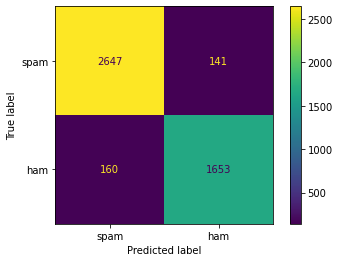

In [123]:
# Verwende cross_val_predict, um Vorhersagen für jeden Fold zu erhalten
y_pred = cross_val_predict(model, X, Y, cv=5)

# Berechne die Confusion Matrix
cm = confusion_matrix(Y, y_pred)
#print("Confusion Matrix:")
#print(cm)

#cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels={'ham','spam'})
disp.plot()

plt.show()

Benchmark bei modifizierter Anwendung von XGBoost und modifizierter Daten

44 Features

In [124]:
df = pd.read_csv('selected_data_44.csv', header=None)
Y=df[45]
X=df.drop([45],axis=1)

model = XGBClassifier(random_state=2, n_estimators=100, learning_rate= 0.03, max_depth=8, colsample_bytree=0.3 )

scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score)
}

scores = cross_validate(model, X, Y, cv=5, scoring=scorers)

accuracy_scores = scores['test_accuracy']
precision_scores = scores['test_precision']

print('Accuracy:', np.round(scores['test_accuracy']*100, 2))
print('Accuracy mean: %0.2f' % (scores['test_accuracy'].mean()*100))
print('---')
print('Precision:', np.round(scores['test_precision']*100, 2))
print('Precision mean: %0.2f' % (scores['test_precision'].mean()*100))

cv_results = scores

Accuracy: [95.33 98.48 99.02 99.57 90.98]
Accuracy mean: 96.67
---
Precision: [91.45 98.34 98.9  99.72 93.46]
Precision mean: 96.37


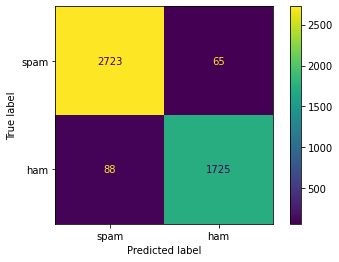

In [125]:
# Verwende cross_val_predict, um Vorhersagen für jeden Fold zu erhalten
y_pred = cross_val_predict(model, X, Y, cv=5)

# Berechne die Confusion Matrix
cm = confusion_matrix(Y, y_pred)
#print("Confusion Matrix:")
#print(cm)

#cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels={'ham','spam'})
disp.plot()

plt.show()

37 Features

In [126]:
df = pd.read_csv('selected_data_37.csv', header=None)
Y=df[38]
X=df.drop([38],axis=1)

model = XGBClassifier(random_state=2, n_estimators=100, learning_rate= 0.06, max_depth=8, colsample_bytree=0.3)

scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score)
}

scores = cross_validate(model, X, Y, cv=5, scoring=scorers)

accuracy_scores = scores['test_accuracy']
precision_scores = scores['test_precision']

print('Accuracy:', np.round(scores['test_accuracy']*100, 2))
print('Accuracy mean: %0.2f' % (scores['test_accuracy'].mean()*100))
print('---')
print('Precision:', np.round(scores['test_precision']*100, 2))
print('Precision mean: %0.2f' % (scores['test_precision'].mean()*100))

Accuracy: [90.88 99.46 99.46 99.89 92.17]
Accuracy mean: 96.37
---
Precision: [81.92 98.91 98.91 99.72 97.08]
Precision mean: 95.31


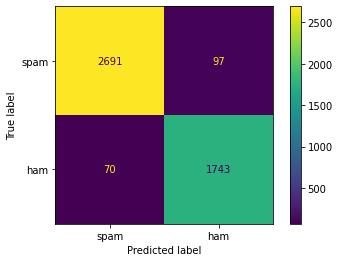

In [127]:
# Verwende cross_val_predict, um Vorhersagen für jeden Fold zu erhalten
y_pred = cross_val_predict(model, X, Y, cv=5)

# Berechne die Confusion Matrix
cm = confusion_matrix(Y, y_pred)
#print("Confusion Matrix:")
#print(cm)

#cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels={'ham','spam'})
disp.plot()

plt.show()